In [ ]:
from langgraph.graph import StateGraph,START,END

In [4]:
from typing import TypedDict

class BMIState(TypedDict):
    weight : float
    height : float
    bmi : float
    category : str

In [5]:
def calculate_bmi(state:BMIState)->BMIState:
    state['bmi'] = state['weight']/(state['height']**2)
    return state

In [6]:
def category_finder(state:BMIState)->BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state["category"] = "Normal"
    elif 25 <= bmi < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"
    return state

In [7]:
graph = StateGraph(BMIState)
graph.add_node("BMIFinder",calculate_bmi)
graph.add_node("CategoryFinder",category_finder)
graph.add_edge(START,"BMIFinder")
graph.add_edge("BMIFinder","CategoryFinder")
graph.add_edge("CategoryFinder",END)
workflow = graph.compile()

In [12]:
intial_state = {'weight':80, 'height':1.73}

final_state = workflow.invoke(intial_state)

print(final_state)

{'weight': 80, 'height': 1.73, 'bmi': 26.729927495071667, 'category': 'Overweight'}


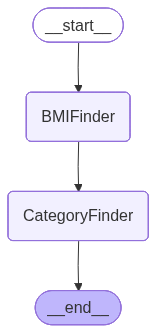

In [14]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())